<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/MARCA-Color.jpg" title="Title text" width="50%" height="50%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales II-2018 </h1>

<H3 align='center'> Tarea 2 - Redes Convolucionales y sus aplicaciones </H3>
<hr style="height:2px;border:none"/>

### Pregunta 2. Transfer Learning.

Integrantes:

- Christian Da Rocha, ROL: 2018.90.251-9
- Rodrigo Hermosilla, ROL: 95.74.144-4


##### Carga inicial de librerias
> En la siguiente sección y de manera previa se cargan todas las librerías necesarias para el ejercicio. Para efectos de mantener cierto orden con el código de las preguntas del ejercicio, se determino que todas las cargas se realizaran previamente, no obstante, se entiende que esto podría generar alguna ineficiencia en el consumo de recursos, pero que suponemos es marginal.

In [11]:
from keras.datasets import cifar100
import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,Activation,Input,BatchNormalization
from keras.optimizers import SGD
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.preprocessing import StandardScaler

> Descarga y asignación de variables estructuras globales

##### Pregunta A.

<div class="alert alert-block alert-success">
    <b>Nota: </b>Para efectos de mejorar la modularización, el ejercicio construye una serie de funciones, permitiendo además su reutilización en distintos instantes.
</div>

In [12]:
def getData():
    global x_train, y_train, x_test, y_test, x_train_norm, x_test_norm
    (x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
    y_train = keras.utils.to_categorical(y_train, num_classes=100)
    y_test = keras.utils.to_categorical(y_test, num_classes=100)
    x_train_norm = x_train/255.0
    x_test_norm = x_test/255.0

In [13]:
def plotChart(title, v1, l1, v2, l2,v3, l3,v4, l4):
    fig=plt.figure(figsize=(15,5))
    plt.title(title)
    plt.axis('off')
    fig.add_subplot(2,1,1) 
    plt.plot(v1,label=l1, color='y')
    plt.plot(v2,label=l2, color='g')
    plt.legend(loc='upper left')
    plt.ylabel('Error')
    fig.add_subplot(2,1,2) 
    plt.plot(v3,label=l3, color='b')
    plt.plot(v4,label=l4, color='r')
    plt.legend(loc='upper left')
    plt.ylabel('Accuracy')
    plt.xlabel('# epochs')
    plt.show()

In [14]:
def modelA():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
    model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [15]:
getData()
model_a=modelA()
model_a.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

In [16]:
def trainingA(model):
    optimizer_ = SGD(lr=0.01,momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
    history=model.fit(x_train_norm, y_train, batch_size=128,epochs=15,verbose=1, validation_data=(x_test_norm,y_test)) 
    return history

In [17]:
history_a = trainingA(model_a)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 8s 163us/step - loss: 4.3818 - acc: 0.0411 - val_loss: 3.9257 - val_acc: 0.0981
Epoch 2/15
50000/50000 [==============================] - 8s 156us/step - loss: 3.8378 - acc: 0.1142 - val_loss: 3.5899 - val_acc: 0.1687
Epoch 3/15
50000/50000 [==============================] - 8s 156us/step - loss: 3.4675 - acc: 0.1812 - val_loss: 3.2034 - val_acc: 0.2399
Epoch 4/15
50000/50000 [==============================] - 8s 162us/step - loss: 3.1172 - acc: 0.2454 - val_loss: 2.9579 - val_acc: 0.2838
Epoch 5/15
50000/50000 [==============================] - 8s 166us/step - loss: 2.8454 - acc: 0.2959 - val_loss: 2.7546 - val_acc: 0.3247
Epoch 6/15
50000/50000 [==============================] - 8s 161us/step - loss: 2.6058 - acc: 0.3431 - val_loss: 2.5978 - val_acc: 0.3633
Epoch 7/15
50000/50000 [==============================] - 8s 155us/step - loss: 2.3925 - acc: 0.3870 - val_loss: 2.4733 - 

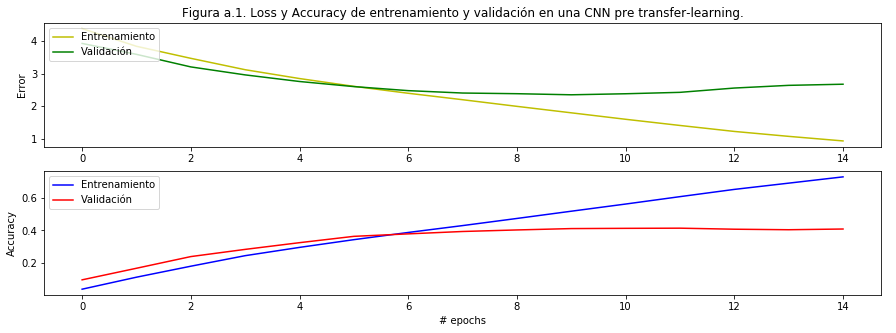

In [18]:
plotChart('Figura a.1. Loss y Accuracy de entrenamiento y validación en una CNN pre transfer-learning.', 
          history_a.history['loss'], 'Entrenamiento',history_a.history['val_loss'], 'Validación',
          history_a.history['acc'], 'Entrenamiento',history_a.history['val_acc'], 'Validación'
         )

> Tal como se aprecia en la figura **a.1**, con esta configuración de red el error de entrenamiento tiende a sobreajustarse, y al probarlo con datos de validación se verifica que no responde adecuadamente.

##### Pregunta B.

In [19]:
def modelB1():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [20]:
getData()
model_b1=modelB1()
history_b1 = trainingA(model_b1)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 12s 233us/step - loss: 4.3840 - acc: 0.0359 - val_loss: 4.5134 - val_acc: 0.0175
Epoch 2/15
50000/50000 [==============================] - 11s 228us/step - loss: 3.9426 - acc: 0.0944 - val_loss: 4.3615 - val_acc: 0.0438
Epoch 3/15
50000/50000 [==============================] - 11s 230us/step - loss: 3.7053 - acc: 0.1336 - val_loss: 4.1944 - val_acc: 0.0779
Epoch 4/15
50000/50000 [==============================] - 11s 230us/step - loss: 3.5325 - acc: 0.1617 - val_loss: 4.0643 - val_acc: 0.1095
Epoch 5/15
50000/50000 [==============================] - 11s 228us/step - loss: 3.3748 - acc: 0.1910 - val_loss: 3.9915 - val_acc: 0.1124
Epoch 6/15
50000/50000 [==============================] - 11s 218us/step - loss: 3.2484 - acc: 0.2132 - val_loss: 3.8461 - val_acc: 0.1325
Epoch 7/15
50000/50000 [==============================] - 11s 211us/step - loss: 3.1437 - acc: 0.2339 - val_loss: 3.

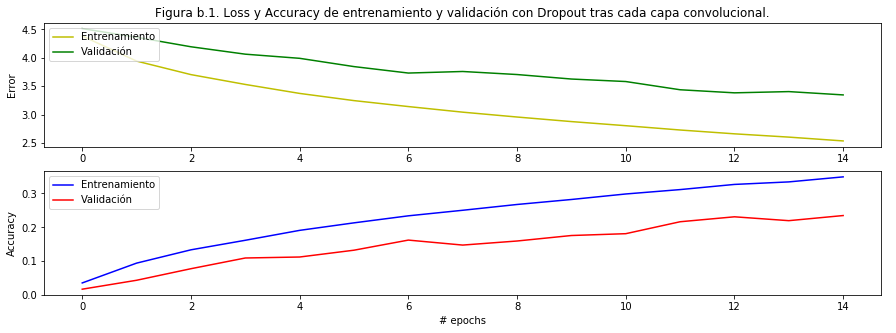

In [21]:
plotChart('Figura b.1. Loss y Accuracy de entrenamiento y validación con Dropout tras cada capa convolucional.', 
          history_b1.history['loss'], 'Entrenamiento',history_b1.history['val_loss'], 'Validación',
          history_b1.history['acc'], 'Entrenamiento',history_b1.history['val_acc'], 'Validación'
         )

In [22]:
def modelB2():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
    model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [23]:
getData()
model_b2=modelB2()
history_b2 = trainingA(model_b2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 8s 159us/step - loss: 4.5517 - acc: 0.0181 - val_loss: 4.3671 - val_acc: 0.0498
Epoch 2/15
50000/50000 [==============================] - 8s 154us/step - loss: 4.1823 - acc: 0.0605 - val_loss: 3.9304 - val_acc: 0.1094
Epoch 3/15
50000/50000 [==============================] - 8s 163us/step - loss: 3.8939 - acc: 0.0985 - val_loss: 3.7040 - val_acc: 0.1473
Epoch 4/15
50000/50000 [==============================] - 8s 161us/step - loss: 3.6811 - acc: 0.1337 - val_loss: 3.4482 - val_acc: 0.1875
Epoch 5/15
50000/50000 [==============================] - 8s 162us/step - loss: 3.4716 - acc: 0.1711 - val_loss: 3.2460 - val_acc: 0.2239
Epoch 6/15
50000/50000 [==============================] - 8s 159us/step - loss: 3.3033 - acc: 0.1998 - val_loss: 3.0897 - val_acc: 0.2485
Epoch 7/15
50000/50000 [==============================] - 8s 159us/step - loss: 3.1607 - acc: 0.2269 - val_loss: 2.9596 - 

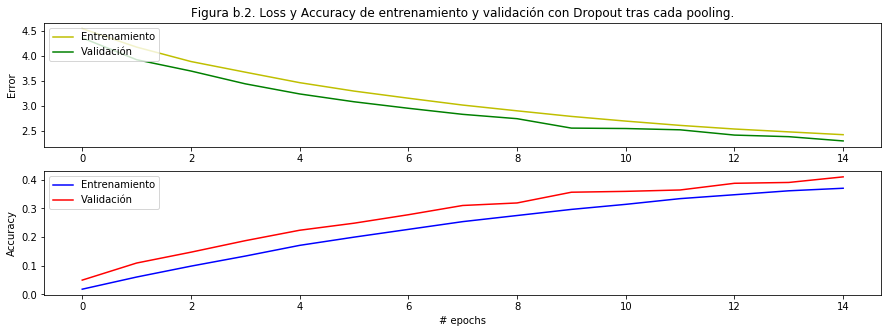

In [24]:
plotChart('Figura b.2. Loss y Accuracy de entrenamiento y validación con Dropout tras cada pooling.', 
          history_b2.history['loss'], 'Entrenamiento',history_b2.history['val_loss'], 'Validación',
          history_b2.history['acc'], 'Entrenamiento',history_b2.history['val_acc'], 'Validación'
         )

In [25]:
def modelB3():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train_norm.shape[1:],activation='relu'))
    model.add(Conv2D(32, (3, 3),padding='same',activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Conv2D(64, (3, 3),padding='same',activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [26]:
getData()
model_b3=modelB3()
history_b3 = trainingA(model_b3)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 10s 196us/step - loss: 4.2535 - acc: 0.0544 - val_loss: 4.2838 - val_acc: 0.0820
Epoch 2/15
50000/50000 [==============================] - 10s 197us/step - loss: 3.7635 - acc: 0.1257 - val_loss: 3.9865 - val_acc: 0.1539
Epoch 3/15
50000/50000 [==============================] - 10s 194us/step - loss: 3.4479 - acc: 0.1809 - val_loss: 3.7783 - val_acc: 0.1961
Epoch 4/15
50000/50000 [==============================] - 10s 197us/step - loss: 3.1832 - acc: 0.2264 - val_loss: 3.4846 - val_acc: 0.2557
Epoch 5/15
50000/50000 [==============================] - 10s 192us/step - loss: 2.9641 - acc: 0.2700 - val_loss: 3.3842 - val_acc: 0.2766
Epoch 6/15
50000/50000 [==============================] - 9s 183us/step - loss: 2.7800 - acc: 0.3056 - val_loss: 3.2192 - val_acc: 0.2996
Epoch 7/15
50000/50000 [==============================] - 9s 189us/step - loss: 2.6214 - acc: 0.3392 - val_loss: 3.20

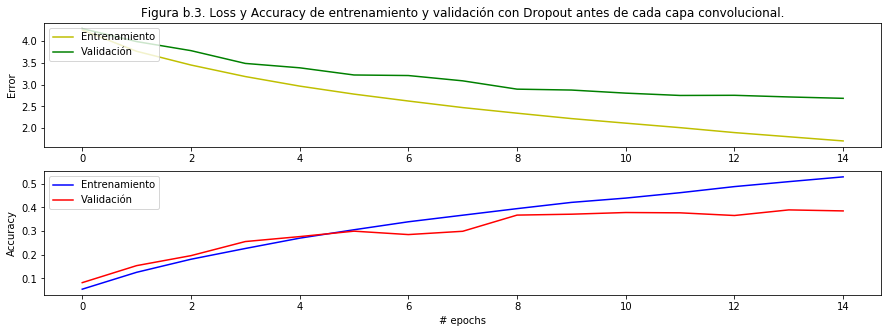

In [27]:
plotChart('Figura b.3. Loss y Accuracy de entrenamiento y validación con Dropout antes de cada capa convolucional.', 
          history_b3.history['loss'], 'Entrenamiento',history_b3.history['val_loss'], 'Validación',
          history_b3.history['acc'], 'Entrenamiento',history_b3.history['val_acc'], 'Validación'
         )

> Tal como se aprecia en las figuras **b.1** a **b.6**, el mejor comportamiento se obtiene aplicando *dropout* despues del pooling. Esto se debe a que si se aplica en otro lugar, lo que tenemos es una perdida de características que influyen en la mejora del entrenamiento.

##### Pregunta C.

In [28]:
def modelVGG(x_train, x_test):
    global x_train_vgg, x_test_vgg, features_train, features_test
    x_train_vgg = preprocess_input(x_train)
    x_test_vgg = preprocess_input(x_test)
    input_tensor=Input(shape=x_train_vgg.shape[1:])
    modelVGG = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor ) # LOAD PRETRAINED MODEL 
    features_train = modelVGG.predict(x_train_vgg)
    features_test = modelVGG.predict(x_test_vgg)
    return modelVGG

In [29]:
model_vgg=modelVGG(x_train, x_test)
model_vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

> La red *VGG16* se entreno restando la media de cada canal a cada punto del set. La media, en este caso, es una matriz de tres elementos obtenidos por el promedio de R, G, B píxeles de todas las imágenes obtenidas del set  de imagenes entrenadas. Los valores para este set son: $[103.939, 116.779, 123.68]$. Para poder aplicar esto sobre nuestro propio set de entrenamiento, se usa la función preprocess_input().

> La eliminación de las capas densas y el reemplazo de estas por nuevas capas a entrenar, se realiza en el punto **D**.

##### Pregunta D.

In [38]:
def modelVGGChangedD(model_vgg):
    for i in range(4):
        model_vgg.layers.pop() 
    model = Sequential()
    model.add(Flatten(input_shape=features_train.shape[1:]))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [39]:
model_vgg_d=modelVGGChangedD(model_vgg)

In [40]:
model_vgg_d.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               102500    
_________________________________________________________________
activation_7 (Activation)    (None, 100)               0         
Total params: 627,812
Trainable params: 627,812
Non-trainable params: 0
_________________________________________________________________


In [41]:
def trainingD(model):
    global xtr, xt
    optimizer_ = SGD(lr=0.01,momentum=0.9)
    model.compile(optimizer=optimizer_,loss='categorical_crossentropy', metrics=['accuracy'])
    history=model.fit(features_train, y_train,epochs=255, batch_size=128,verbose=1,validation_data=(features_test,y_test))
    return history

In [42]:
history_d = trainingD(model_vgg_d)

Train on 50000 samples, validate on 10000 samples
Epoch 1/255
50000/50000 [==============================] - 1s 19us/step - loss: 14.4960 - acc: 0.0918 - val_loss: 14.2375 - val_acc: 0.1148
Epoch 2/255
50000/50000 [==============================] - 1s 16us/step - loss: 14.3606 - acc: 0.1063 - val_loss: 14.4703 - val_acc: 0.1009
Epoch 3/255
50000/50000 [==============================] - 1s 16us/step - loss: 14.3888 - acc: 0.1057 - val_loss: 14.3865 - val_acc: 0.1057
Epoch 4/255
50000/50000 [==============================] - 1s 16us/step - loss: 14.2950 - acc: 0.1120 - val_loss: 14.2067 - val_acc: 0.1171
Epoch 5/255
50000/50000 [==============================] - 1s 16us/step - loss: 14.4073 - acc: 0.1053 - val_loss: 14.3838 - val_acc: 0.1068
Epoch 6/255
50000/50000 [==============================] - 1s 16us/step - loss: 14.3792 - acc: 0.1071 - val_loss: 14.3220 - val_acc: 0.1105
Epoch 7/255
50000/50000 [==============================] - 1s 16us/step - loss: 14.3332 - acc: 0.1100 - val_lo

Epoch 59/255
50000/50000 [==============================] - 1s 18us/step - loss: 14.3023 - acc: 0.1125 - val_loss: 14.2342 - val_acc: 0.1167
Epoch 60/255
50000/50000 [==============================] - 1s 15us/step - loss: 14.2694 - acc: 0.1146 - val_loss: 14.3020 - val_acc: 0.1126
Epoch 61/255
50000/50000 [==============================] - 1s 15us/step - loss: 14.3246 - acc: 0.1112 - val_loss: 14.3235 - val_acc: 0.1112
Epoch 62/255
50000/50000 [==============================] - 1s 15us/step - loss: 14.3176 - acc: 0.1116 - val_loss: 14.3569 - val_acc: 0.1091
Epoch 63/255
50000/50000 [==============================] - 1s 14us/step - loss: 14.3962 - acc: 0.1067 - val_loss: 14.3527 - val_acc: 0.1094
Epoch 64/255
50000/50000 [==============================] - 1s 15us/step - loss: 14.3541 - acc: 0.1093 - val_loss: 14.3295 - val_acc: 0.1109
Epoch 65/255
50000/50000 [==============================] - 1s 14us/step - loss: 14.3844 - acc: 0.1075 - val_loss: 14.3564 - val_acc: 0.1092
Epoch 66/255


Epoch 117/255
50000/50000 [==============================] - 1s 16us/step - loss: 14.3007 - acc: 0.1127 - val_loss: 14.2965 - val_acc: 0.1130
Epoch 118/255
50000/50000 [==============================] - 1s 14us/step - loss: 14.3228 - acc: 0.1113 - val_loss: 14.2929 - val_acc: 0.1132
Epoch 119/255
50000/50000 [==============================] - 1s 13us/step - loss: 14.2863 - acc: 0.1136 - val_loss: 14.2326 - val_acc: 0.1169
Epoch 120/255
50000/50000 [==============================] - 1s 17us/step - loss: 14.2580 - acc: 0.1154 - val_loss: 14.2484 - val_acc: 0.1160
Epoch 121/255
50000/50000 [==============================] - 1s 14us/step - loss: 14.2863 - acc: 0.1136 - val_loss: 14.2390 - val_acc: 0.1165
Epoch 122/255
50000/50000 [==============================] - 1s 14us/step - loss: 14.2523 - acc: 0.1157 - val_loss: 14.2365 - val_acc: 0.1166
Epoch 123/255
50000/50000 [==============================] - 1s 14us/step - loss: 14.2359 - acc: 0.1167 - val_loss: 14.2271 - val_acc: 0.1173
Epoch 

Epoch 175/255
50000/50000 [==============================] - 1s 17us/step - loss: 14.2617 - acc: 0.1152 - val_loss: 14.2419 - val_acc: 0.1164
Epoch 176/255
50000/50000 [==============================] - 1s 15us/step - loss: 14.2871 - acc: 0.1136 - val_loss: 14.2694 - val_acc: 0.1147
Epoch 177/255
50000/50000 [==============================] - 1s 15us/step - loss: 14.3038 - acc: 0.1126 - val_loss: 14.2694 - val_acc: 0.1147
Epoch 178/255
50000/50000 [==============================] - 1s 14us/step - loss: 14.2973 - acc: 0.1129 - val_loss: 14.2613 - val_acc: 0.1152
Epoch 179/255
50000/50000 [==============================] - 1s 14us/step - loss: 14.2818 - acc: 0.1139 - val_loss: 14.2307 - val_acc: 0.1171
Epoch 180/255
50000/50000 [==============================] - 1s 15us/step - loss: 14.2788 - acc: 0.1141 - val_loss: 14.2242 - val_acc: 0.1175
Epoch 181/255
50000/50000 [==============================] - 1s 14us/step - loss: 14.3009 - acc: 0.1127 - val_loss: 14.2313 - val_acc: 0.1170
Epoch 

Epoch 233/255
50000/50000 [==============================] - 1s 16us/step - loss: 14.2666 - acc: 0.1149 - val_loss: 14.2581 - val_acc: 0.1154
Epoch 234/255
50000/50000 [==============================] - 1s 18us/step - loss: 14.3206 - acc: 0.1115 - val_loss: 14.3322 - val_acc: 0.1108
Epoch 235/255
50000/50000 [==============================] - 1s 18us/step - loss: 14.3580 - acc: 0.1092 - val_loss: 14.3372 - val_acc: 0.1104
Epoch 236/255
50000/50000 [==============================] - 1s 17us/step - loss: 14.3392 - acc: 0.1104 - val_loss: 14.2761 - val_acc: 0.1142
Epoch 237/255
50000/50000 [==============================] - 1s 17us/step - loss: 14.3124 - acc: 0.1120 - val_loss: 14.2803 - val_acc: 0.1140
Epoch 238/255
50000/50000 [==============================] - 1s 17us/step - loss: 14.2516 - acc: 0.1158 - val_loss: 14.2419 - val_acc: 0.1164
Epoch 239/255
50000/50000 [==============================] - 1s 16us/step - loss: 14.2691 - acc: 0.1147 - val_loss: 14.2247 - val_acc: 0.1174
Epoch 

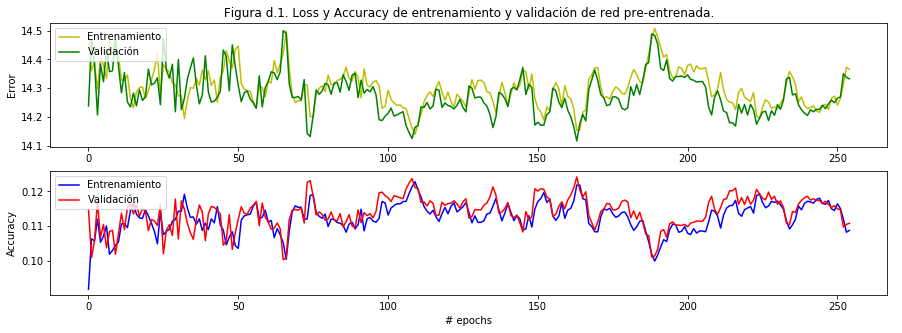

In [43]:
plotChart('Figura d.1. Loss y Accuracy de entrenamiento y validación de red pre-entrenada.', 
          history_d.history['loss'], 'Entrenamiento',history_d.history['val_loss'], 'Validación',
          history_d.history['acc'], 'Entrenamiento',history_d.history['val_acc'], 'Validación'
         )

> Como se puede apreciar en la grafica **d.1**, sin bien existe un error alto, el nivel de convergencia entre el entrenamiento y validación es bastante bueno.

##### Pregunta E.

In [44]:
def modelVGGChangedE(model_vgg):
    for i in range(4):
        model_vgg.layers.pop() 
    model = Sequential()
    model.add(Flatten(input_shape=features_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [45]:
model_vgg_e=modelVGG(x_train, x_test)

In [46]:
model_vgg_chng_e=modelVGGChangedE(model_vgg_e)

In [47]:
history_e = trainingD(model_vgg_chng_e)

Train on 50000 samples, validate on 10000 samples
Epoch 1/255
50000/50000 [==============================] - 1s 28us/step - loss: 3.3067 - acc: 0.2719 - val_loss: 2.4424 - val_acc: 0.3937
Epoch 2/255
50000/50000 [==============================] - 1s 19us/step - loss: 2.4829 - acc: 0.3759 - val_loss: 2.3138 - val_acc: 0.4083
Epoch 3/255
50000/50000 [==============================] - 1s 18us/step - loss: 2.2584 - acc: 0.4139 - val_loss: 2.2577 - val_acc: 0.4216
Epoch 4/255
50000/50000 [==============================] - 1s 18us/step - loss: 2.1188 - acc: 0.4355 - val_loss: 2.2188 - val_acc: 0.4300
Epoch 5/255
50000/50000 [==============================] - 1s 18us/step - loss: 2.0121 - acc: 0.4608 - val_loss: 2.2170 - val_acc: 0.4290
Epoch 6/255
50000/50000 [==============================] - 1s 18us/step - loss: 1.9341 - acc: 0.4737 - val_loss: 2.1987 - val_acc: 0.4390
Epoch 7/255
50000/50000 [==============================] - 1s 18us/step - loss: 1.8582 - acc: 0.4894 - val_loss: 2.1963 - 

50000/50000 [==============================] - 1s 22us/step - loss: 0.6744 - acc: 0.7848 - val_loss: 2.7430 - val_acc: 0.4436
Epoch 60/255
50000/50000 [==============================] - 1s 22us/step - loss: 0.6659 - acc: 0.7872 - val_loss: 2.7559 - val_acc: 0.4450
Epoch 61/255
50000/50000 [==============================] - 1s 24us/step - loss: 0.6680 - acc: 0.7862 - val_loss: 2.7579 - val_acc: 0.4455
Epoch 62/255
50000/50000 [==============================] - 1s 24us/step - loss: 0.6577 - acc: 0.7895 - val_loss: 2.7542 - val_acc: 0.4446
Epoch 63/255
50000/50000 [==============================] - 1s 23us/step - loss: 0.6540 - acc: 0.7904 - val_loss: 2.7688 - val_acc: 0.4443
Epoch 64/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.6495 - acc: 0.7932 - val_loss: 2.7566 - val_acc: 0.4433
Epoch 65/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.6480 - acc: 0.7936 - val_loss: 2.7756 - val_acc: 0.4417
Epoch 66/255
50000/50000 [==============

Epoch 118/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.4616 - acc: 0.8497 - val_loss: 3.0738 - val_acc: 0.4414
Epoch 119/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.4532 - acc: 0.8516 - val_loss: 3.0635 - val_acc: 0.4418
Epoch 120/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.4601 - acc: 0.8524 - val_loss: 3.0695 - val_acc: 0.4388
Epoch 121/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.4566 - acc: 0.8511 - val_loss: 3.0713 - val_acc: 0.4381
Epoch 122/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.4588 - acc: 0.8511 - val_loss: 3.0542 - val_acc: 0.4409
Epoch 123/255
50000/50000 [==============================] - 1s 21us/step - loss: 0.4363 - acc: 0.8592 - val_loss: 3.0761 - val_acc: 0.4388
Epoch 124/255
50000/50000 [==============================] - 1s 22us/step - loss: 0.4443 - acc: 0.8556 - val_loss: 3.0801 - val_acc: 0.4358
Epoch 125/255
50000/

50000/50000 [==============================] - 1s 19us/step - loss: 0.3779 - acc: 0.8758 - val_loss: 3.2579 - val_acc: 0.4405
Epoch 177/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.3722 - acc: 0.8797 - val_loss: 3.2592 - val_acc: 0.4400
Epoch 178/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.3667 - acc: 0.8804 - val_loss: 3.2648 - val_acc: 0.4377
Epoch 179/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.3678 - acc: 0.8795 - val_loss: 3.2907 - val_acc: 0.4365
Epoch 180/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.3711 - acc: 0.8790 - val_loss: 3.2721 - val_acc: 0.4380
Epoch 181/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.3730 - acc: 0.8798 - val_loss: 3.2641 - val_acc: 0.4345
Epoch 182/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.3587 - acc: 0.8841 - val_loss: 3.2752 - val_acc: 0.4347
Epoch 183/255
50000/50000 [=======

50000/50000 [==============================] - 1s 21us/step - loss: 0.3274 - acc: 0.8941 - val_loss: 3.3387 - val_acc: 0.4363
Epoch 235/255
50000/50000 [==============================] - 1s 21us/step - loss: 0.3154 - acc: 0.8960 - val_loss: 3.3726 - val_acc: 0.4386
Epoch 236/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.3215 - acc: 0.8957 - val_loss: 3.3794 - val_acc: 0.4381
Epoch 237/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.3215 - acc: 0.8944 - val_loss: 3.3562 - val_acc: 0.4404
Epoch 238/255
50000/50000 [==============================] - 1s 21us/step - loss: 0.3197 - acc: 0.8961 - val_loss: 3.3822 - val_acc: 0.4392
Epoch 239/255
50000/50000 [==============================] - 1s 21us/step - loss: 0.3218 - acc: 0.8959 - val_loss: 3.4064 - val_acc: 0.4407
Epoch 240/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.3190 - acc: 0.8967 - val_loss: 3.3759 - val_acc: 0.4371
Epoch 241/255
50000/50000 [=======

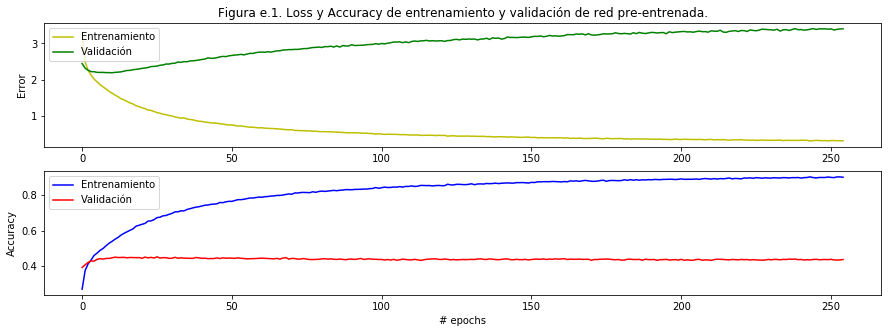

In [48]:
plotChart('Figura e.1. Loss y Accuracy de entrenamiento y validación de red pre-entrenada.', 
          history_e.history['loss'], 'Entrenamiento',history_e.history['val_loss'], 'Validación',
          history_e.history['acc'], 'Entrenamiento',history_e.history['val_acc'], 'Validación'
         )

> Tal como se aprecia en la figura **e.1**, se mejora mucho el desempeño de la red, en terminos de error logrado, sin embargo, no notamos mayor diferencia en el tiempo de ejecución como se sugiere en el enunciado.

##### Pregunta F.

In [56]:
x_train_vgg = preprocess_input(x_train)
x_test_vgg = preprocess_input(x_test)

In [57]:
input_tensor=Input(shape=x_train_vgg.shape[1:])
model_vgg_f = VGG16(weights='imagenet', include_top=False,input_tensor=input_tensor ) # LOAD PRETRAINED MODEL 

In [58]:
model_vgg_f.layers.pop() #delete last softmax layer
model_vgg_f.summary()
features_train = model_vgg_f.predict(x_train_vgg)
features_test = model_vgg_f.predict(x_test_vgg)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
__________

In [59]:
def modelVGGChangedF(model_vgg):
    model = Sequential()
    model.add(Flatten(input_shape=features_train.shape[1:]))
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

In [60]:
model_f = modelVGGChangedF(model_vgg_f);

In [61]:
history_f = trainingD(model_f)

Train on 50000 samples, validate on 10000 samples
Epoch 1/255
50000/50000 [==============================] - 2s 31us/step - loss: 3.3054 - acc: 0.2722 - val_loss: 2.4262 - val_acc: 0.3913
Epoch 2/255
50000/50000 [==============================] - 1s 20us/step - loss: 2.4886 - acc: 0.3758 - val_loss: 2.3010 - val_acc: 0.4182
Epoch 3/255
50000/50000 [==============================] - 1s 21us/step - loss: 2.2639 - acc: 0.4121 - val_loss: 2.2473 - val_acc: 0.4244
Epoch 4/255
50000/50000 [==============================] - 1s 19us/step - loss: 2.1153 - acc: 0.4386 - val_loss: 2.2331 - val_acc: 0.4260
Epoch 5/255
50000/50000 [==============================] - 1s 21us/step - loss: 2.0225 - acc: 0.4553 - val_loss: 2.2153 - val_acc: 0.4332
Epoch 6/255
50000/50000 [==============================] - 1s 19us/step - loss: 1.9392 - acc: 0.4729 - val_loss: 2.2086 - val_acc: 0.4338
Epoch 7/255
50000/50000 [==============================] - 1s 20us/step - loss: 1.8689 - acc: 0.4865 - val_loss: 2.2069 - 

50000/50000 [==============================] - 1s 22us/step - loss: 0.6828 - acc: 0.7836 - val_loss: 2.7193 - val_acc: 0.4436
Epoch 60/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.6754 - acc: 0.7846 - val_loss: 2.7319 - val_acc: 0.4484
Epoch 61/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.6693 - acc: 0.7870 - val_loss: 2.7454 - val_acc: 0.4450
Epoch 62/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.6610 - acc: 0.7886 - val_loss: 2.7552 - val_acc: 0.4431
Epoch 63/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.6550 - acc: 0.7907 - val_loss: 2.7592 - val_acc: 0.4415
Epoch 64/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.6499 - acc: 0.7921 - val_loss: 2.7695 - val_acc: 0.4431
Epoch 65/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.6382 - acc: 0.7955 - val_loss: 2.7806 - val_acc: 0.4435
Epoch 66/255
50000/50000 [==============

Epoch 118/255
50000/50000 [==============================] - 1s 21us/step - loss: 0.4493 - acc: 0.8544 - val_loss: 3.0764 - val_acc: 0.4414
Epoch 119/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.4493 - acc: 0.8546 - val_loss: 3.0509 - val_acc: 0.4383
Epoch 120/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.4460 - acc: 0.8558 - val_loss: 3.0542 - val_acc: 0.4359
Epoch 121/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.4559 - acc: 0.8506 - val_loss: 3.0554 - val_acc: 0.4396
Epoch 122/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.4432 - acc: 0.8550 - val_loss: 3.0820 - val_acc: 0.4392
Epoch 123/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.4457 - acc: 0.8549 - val_loss: 3.0763 - val_acc: 0.4386
Epoch 124/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.4502 - acc: 0.8521 - val_loss: 3.0865 - val_acc: 0.4362
Epoch 125/255
50000/

50000/50000 [==============================] - 1s 23us/step - loss: 0.3669 - acc: 0.8805 - val_loss: 3.2078 - val_acc: 0.4413
Epoch 177/255
50000/50000 [==============================] - 1s 23us/step - loss: 0.3705 - acc: 0.8804 - val_loss: 3.2386 - val_acc: 0.4436
Epoch 178/255
50000/50000 [==============================] - 1s 22us/step - loss: 0.3688 - acc: 0.8809 - val_loss: 3.2330 - val_acc: 0.4418
Epoch 179/255
50000/50000 [==============================] - 1s 22us/step - loss: 0.3618 - acc: 0.8818 - val_loss: 3.2023 - val_acc: 0.4435
Epoch 180/255
50000/50000 [==============================] - 1s 23us/step - loss: 0.3718 - acc: 0.8797 - val_loss: 3.2268 - val_acc: 0.4438
Epoch 181/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.3638 - acc: 0.8824 - val_loss: 3.2290 - val_acc: 0.4413
Epoch 182/255
50000/50000 [==============================] - 1s 19us/step - loss: 0.3661 - acc: 0.8811 - val_loss: 3.2300 - val_acc: 0.4413
Epoch 183/255
50000/50000 [=======

50000/50000 [==============================] - 1s 22us/step - loss: 0.3217 - acc: 0.8954 - val_loss: 3.3335 - val_acc: 0.4394
Epoch 235/255
50000/50000 [==============================] - 1s 23us/step - loss: 0.3252 - acc: 0.8932 - val_loss: 3.3209 - val_acc: 0.4438
Epoch 236/255
50000/50000 [==============================] - 1s 22us/step - loss: 0.3261 - acc: 0.8936 - val_loss: 3.3319 - val_acc: 0.4407
Epoch 237/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.3133 - acc: 0.8968 - val_loss: 3.3394 - val_acc: 0.4419
Epoch 238/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.3210 - acc: 0.8951 - val_loss: 3.3408 - val_acc: 0.4369
Epoch 239/255
50000/50000 [==============================] - 1s 21us/step - loss: 0.3259 - acc: 0.8941 - val_loss: 3.3222 - val_acc: 0.4379
Epoch 240/255
50000/50000 [==============================] - 1s 20us/step - loss: 0.3226 - acc: 0.8945 - val_loss: 3.3619 - val_acc: 0.4411
Epoch 241/255
50000/50000 [=======

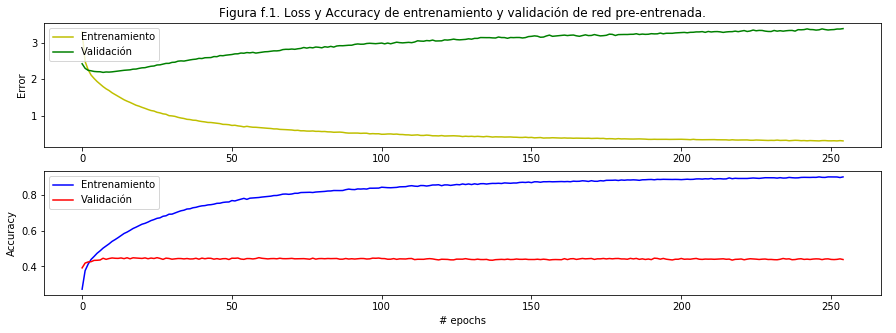

In [62]:
plotChart('Figura f.1. Loss y Accuracy de entrenamiento y validación de red pre-entrenada.', 
          history_f.history['loss'], 'Entrenamiento',history_f.history['val_loss'], 'Validación',
          history_f.history['acc'], 'Entrenamiento',history_f.history['val_acc'], 'Validación'
         )

> Tal como se aprecia en la figura anterior (**f.1**), el cambio de la red si bien provoco menores valores de error, tambien provoco un notoria divergencia entre los casos entrenados, y la validación.

##### Pregunta G.

> En nuestra opinión la tecnica de *transfer learning* es especialmente útil cuando, por una parte se tiene un set bajo o pobre de elementos a entrenar, y por otra se tiene acceso a una red *pre-entrenada* de características similares, y que tenga la madurez suficiente para ser utilizada (se compruebe la calidad de predicción de dicha red por si misma).
Por otra parte, desaconsejamos el uso de la técnica cuando el caso a resolver tiene caracteristicas que no puede ser recuperadas de un modelo *pre-entrenado*, o cuando el ambito de entrenamiento ofrece notorias probabilidades de lograr un modelo de mejor respuesta para el caso particular.